In [1]:
import pandas as pd
df=pd.read_csv('Sentiment Analysis.csv' ,encoding='latin-1',header=None)


In [2]:
df.head()

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [3]:
df.columns=['Target', 'ID' , 'Date and Time' , 'Search Word' , 'Username' , 'Tweets']

In [4]:
df.head()

,Target,ID,Date and Time,Search Word,Username,Tweets
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [5]:
df['Target'].value_counts()

Target
0    800000
4    800000
Name: count, dtype: int64

In [6]:
df['Target']=df['Target'].replace(4,1)

In [7]:
df['Target'].value_counts()

Target
0    800000
1    800000
Name: count, dtype: int64

In [8]:
# 0 -> Negative Tweet
# 1 -> Positive Tweet

In [9]:
df['Tweets'].sample(10)

1564058    Blah, I need to be healthier. More water, less...
172870     - thats my hair guys. oh dip i gotta go!  on-e...
909070     @harrislacewell You are a dope mom too! Love y...
563634     Rain here today in Aberdeenshire going to dent...
271582     is so scared for tomorrow's exam  i want this ...
1072907                                   Watching Up in 3D 
647510                          is work seven until twelve. 
1227427    Been shopping, bought 3 pairs of shoes! Made s...
1183414               @johnhood I'm after your Big Fish.... 
229471              Wishing I was with my gator  @Gatorpie89
Name: Tweets, dtype: object

In [10]:
import re

def clean_text(text):
    text = re.sub(r'@[A-Za-z0-9_]+', '', text)        # Remove mentions
    text = re.sub(r'https?:\/\/\S+', '', text)        # Remove URLs
    text = re.sub(r'RT[\s]+', '', text)               # Remove retweet tag
    text = re.sub(r'#', '', text)                     # Remove hashtag symbol only
    text = re.sub(r'[^\w\s]', '', text)               # Remove punctuation
    return text.lower()


In [11]:
df['Clean Tweets']=df['Tweets'].apply(clean_text)
#applying function to the tweets column

In [12]:
df[['Tweets', 'Clean Tweets']].sample(5)


,Tweets,Clean Tweets
379471,oh my got a headache from hell from last night...,oh my got a headache from hell from last night...
1046200,no more rain here peeps.,no more rain here peeps
452348,so many culminating tasks,so many culminating tasks
714478,I miss my hollybee but atleast we can phone e...,i miss my hollybee but atleast we can phone e...
1463757,@acworkma I will send you a scan if you're int...,i will send you a scan if youre interested


In [13]:
df.head()

,Target,ID,Date and Time,Search Word,Username,Tweets,Clean Tweets
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",awww thats a bummer you shoulda got david ...
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,is upset that he cant update his facebook by t...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,i dived many times for the ball managed to sa...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",no its not behaving at all im mad why am i he...


In [14]:
df = df[['Clean Tweets', 'Target']]
#dropping all columns except Clean Tweets and Target Column

In [15]:
df.head()

,Clean Tweets,Target
0,awww thats a bummer you shoulda got david ...,0
1,is upset that he cant update his facebook by t...,0
2,i dived many times for the ball managed to sa...,0
3,my whole body feels itchy and like its on fire,0
4,no its not behaving at all im mad why am i he...,0


In [16]:
# We donot scale charcaters column so now lets  move on to EDA Step

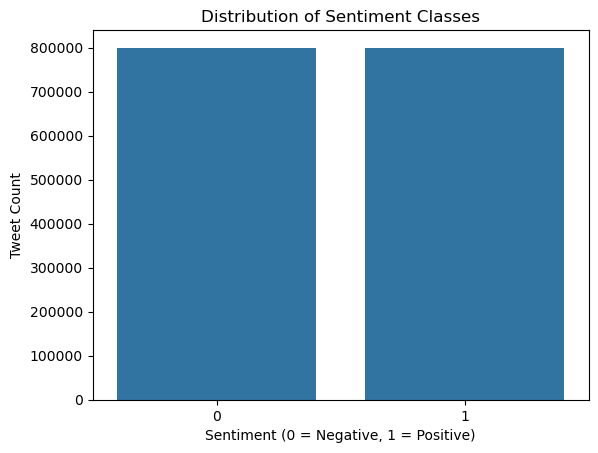

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Target', data=df)
plt.title("Distribution of Sentiment Classes")
plt.xlabel("Sentiment (0 = Negative, 1 = Positive)")
plt.ylabel("Tweet Count")
plt.show()


In [18]:
#As we can see both 0 and 1 (Negative,Postive) are exact same so our Target Column is Balanced

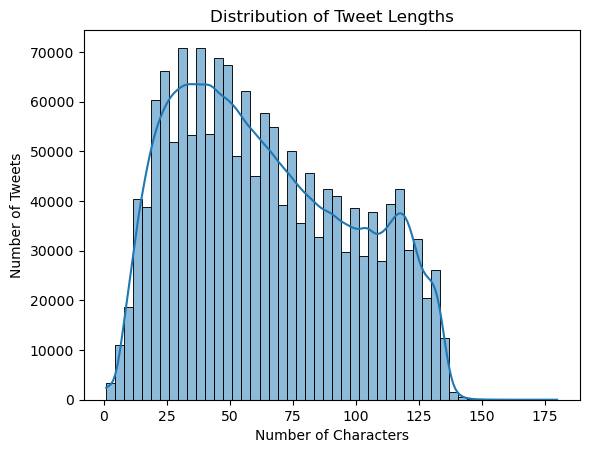

In [19]:
#Checking Tweets length
df['tweet_length'] = df['Clean Tweets'].apply(len)

sns.histplot(data=df, x='tweet_length', bins=50, kde=True)
plt.title("Distribution of Tweet Lengths")
plt.xlabel("Number of Characters")
plt.ylabel("Number of Tweets")
plt.show()

In [20]:
#As we can see in this histogram that most tweets are around 30 to 40 characters , Tweets are not very long 

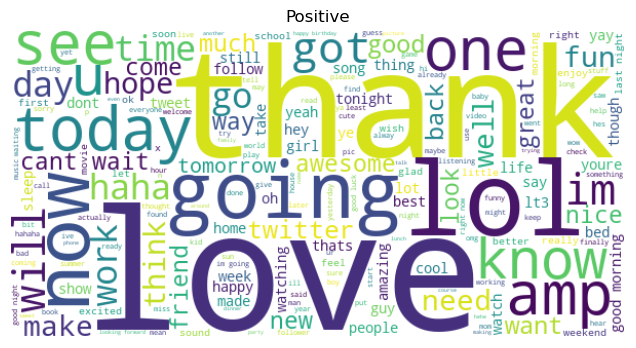

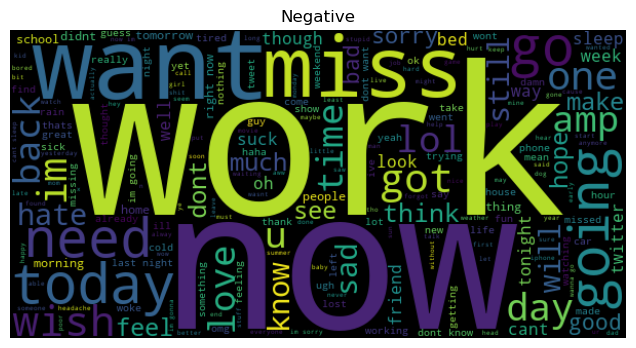

In [21]:
# Import necessary libraries
from wordcloud import WordCloud         # For generating word cloud images
import matplotlib.pyplot as plt         # For plotting/visualizing the word clouds

# Define a function that shows the word cloud for a specific sentiment label
def show_wordcloud(label, color='white'):
    
    # Combine all the cleaned tweets with the given label (0 or 1) into one large string
    text = " ".join(df[df['Target'] == label]['Clean Tweets'])

    # Create a WordCloud object with specified size and background color
    wc = WordCloud(
        width=600,                   # Width of the word cloud image
        height=300,                  # Height of the word cloud image
        background_color=color       # Background color: 'white' or 'black'
    ).generate(text)                 # Generate the word cloud from the combined text

    # Set the size of the plot figure
    plt.figure(figsize=(8, 4))

    # Display the word cloud image
    plt.imshow(wc, interpolation='bilinear')  # 'bilinear' makes the image smoother

    # Remove the axes (x and y axis lines)
    plt.axis('off')

    # Add a title based on the label (1 = Positive, 0 = Negative)
    plt.title('Positive' if label == 1 else 'Negative')

    # Show the plot
    plt.show()

# Generate word cloud for positive tweets (Target = 1)
show_wordcloud(1)  # White background by default

# Generate word cloud for negative tweets (Target = 0) with black background
show_wordcloud(0, color='black')


In [22]:
# We use Word clouds to seee which words occur more 

# Positive Tweets Word Cloud:
# - Big words like "love", "thank", and "lol" show most common positive words.
# - People often express happiness, gratitude, and fun.
# - Words like "today", "going", and "now" show focus on current positive moments.

# Negative Word Cloud:
# - Big words like "work", "miss", and "want" are common in negative tweets.
# - Shows people feel tired, stressed, or missing something.
# - Words like "need", "hate", and "now" show frustration.

# Overall:
# - Bigger words appear more often.
# - Positive tweets talk about love and thanks.
# - Negative tweets mostly talk about work and stress.


In [23]:
# Difference Between Count plot , Histogram and Bar plot

#Count plot -> You have categorical data (like labels: 0 or 1, or male/female), and you just want to count how many of each

#Bar plot -> You already have the data summarized (like top 10 words and their frequency), and you want to compare them

# Histogram -> You want to show distribution of numbers, like tweet lengths, word counts, etc.



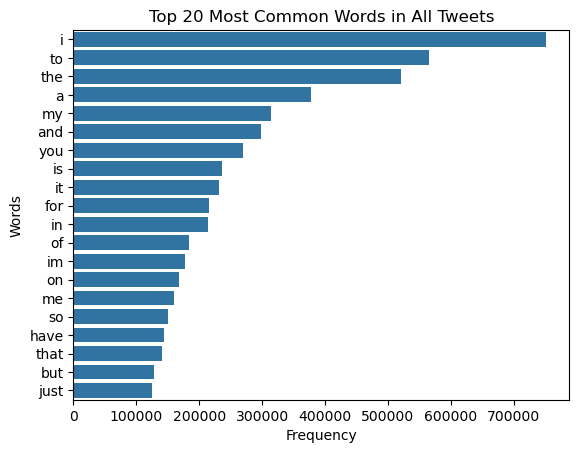

In [24]:
from collections import Counter

all_words = " ".join(df['Clean Tweets']).split()
word_freq = Counter(all_words)
common_words = word_freq.most_common(20)

# Convert to DataFrame for plotting
import pandas as pd
common_df = pd.DataFrame(common_words, columns=['word', 'count'])

# Bar plot
sns.barplot(x='count', y='word', data=common_df)
plt.title("Top 20 Most Common Words in All Tweets")
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.show()


In [25]:
#We have used bar plot to see which words occur how many times in a tweet

# "i" is the most used word, showing tweets are personal.
# Words like "to", "the", "a", "my", and "you" are also very common.
# Many tweets use simple and short words.
# Personal words like "me", "im", "my", "you" appear often.
# Tweets are written in an informal and casual way.
# Most tweets are about personal thoughts and actions.


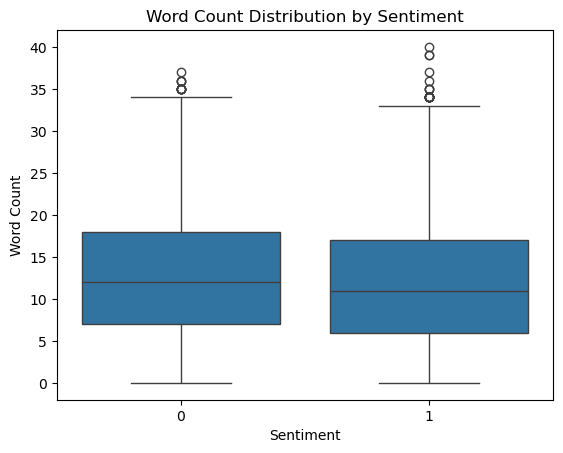

In [26]:
#Box plot :  Purpose: Do positive tweets have more/less words than negative?

df['word_count'] = df['Clean Tweets'].apply(lambda x: len(x.split())) #-> X means each tweet and then splitting it "i love coding" → ['i', 'love', 'coding']

sns.boxplot(x='Target', y='word_count', data=df)
plt.title("Word Count Distribution by Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Word Count")
plt.show()


In [27]:
# Calculate average word count for each sentiment
df['word_count'] = df['Clean Tweets'].apply(lambda x: len(x.split()))

average_word_count = df.groupby('Target')['word_count'].mean()
print(average_word_count)


Target
0    13.038504
1    11.970778
Name: word_count, dtype: float64


In [28]:
# As we can see from box plot and also using mean 

#Target = 0 → These are negative tweets

#On average, they have 13.03 words per tweet.

#Target = 1 → These are positive tweets

#On average, they have 11.97 words per tweet.

#Negative tweets have more words than postive tweets on average



In [60]:
from sklearn.model_selection import train_test_split  # To split data into training and testing
from sklearn.feature_extraction.text import TfidfVectorizer  # To convert text into numeric form
from sklearn.svm import LinearSVC   # Our SVM classifier
from sklearn.metrics import classification_report, accuracy_score  # For evaluation

In [62]:
X=df['Clean Tweets']
y=df['Target']

In [64]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [66]:
# Convert Text to Numeric Form
vectorizer = TfidfVectorizer(max_features=5000)  # Use top 5000 important words

X_train_tfidf = vectorizer.fit_transform(X_train)  # Learn vocabulary and transform training text
X_test_tfidf = vectorizer.transform(X_test)        # Transform test text using same vocab


In [68]:
#TfidfVectorizer converts words into numbers based on importance.

#max_features=5000 limits to top 5000 most important words.

#fit_transform() = learns from and converts training data.

#transform() = converts test data (doesn't learn again).

In [72]:
model = LinearSVC(dual=True) 
model.fit(X_train_tfidf, y_train)


LinearSVC(dual=True)

In [74]:
y_pred = model.predict(X_test_tfidf)

In [76]:
print("Accuracy:", accuracy_score(y_test, y_pred)) 

Accuracy: 0.789915625


In [78]:
print(classification_report(y_test, y_pred))  

              precision    recall  f1-score   support

           0       0.80      0.77      0.79    159494
           1       0.78      0.81      0.79    160506

    accuracy                           0.79    320000
   macro avg       0.79      0.79      0.79    320000
weighted avg       0.79      0.79      0.79    320000



In [80]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.01, 0.1, 1, 10]}
grid = GridSearchCV(LinearSVC(dual=True), param_grid, cv=3)
grid.fit(X_train_tfidf, y_train)

print("Best C:", grid.best_params_)


Best C: {'C': 0.1}


In [82]:
# C	Controls how much you penalize mistakes during training
# Low C	Simpler model, allows small mistakes
# High C	Tries to fit training data very well, may overfit
# Goal	Use GridSearchCV to find the best C value for your dataset

#CV = cross validation 3 means it will divide data into three parts (train data 2 times and test data one time) we will also repeat this process three times

In [84]:
#Now we know Best C: 0.1 so lets just apply

In [86]:
best_model = LinearSVC(C=0.1, dual=True)
best_model.fit(X_train_tfidf, y_train)

# Predict on test set
y_pred = best_model.predict(X_test_tfidf)

In [88]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.77      0.79    159494
           1       0.78      0.81      0.79    160506

    accuracy                           0.79    320000
   macro avg       0.79      0.79      0.79    320000
weighted avg       0.79      0.79      0.79    320000



In [108]:
#output same even after tunnning c so model is already giving fine results so we should stop here

In [110]:
import joblib
joblib.dump(model, "sentiment_svm_model.pkl")
joblib.dump(vectorizer, "tfidf_vectorizer.pkl")


['tfidf_vectorizer.pkl']

In [112]:
# so now we have saved the model lets check model on unseen data

In [118]:
from sklearn.svm import LinearSVC

# Recreate the SVM model (same as before)
model = LinearSVC(C=0.1, dual=True)
model.fit(X_train_tfidf, y_train)  # Assuming you still have these


LinearSVC(C=0.1, dual=True)

In [120]:
tweet = ["I love this product!"]
tweet_tfidf = vectorizer.transform(tweet)
prediction = model.predict(tweet_tfidf)
print("Prediction:", prediction[0])


Prediction: 1


In [122]:
# Model is predicting well